Вычислить значение интеграла $I=\int\limits_{1}^{1.44}P_n(x)dx$, где $P_n(x)=\sum\limits_{i=0}^{n}c_ix^i$, с помощью квадратурных формул трапеций и Симпсона для элементарного отрезка интегрирования. Оценить величину погрешности. Применяя те же квадратурные формулы для составного отрезка интегрирования, вычислить интеграл $I$ с точностью 0.0001. Предварительно оценить шаг интегрирования, при котором достигается заданная точность.
ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Вычислить значение интеграла $I$ аналитически.
2. Задать многочлен $P_n(x)$. Вычислить значение интеграла $I$ по формулам трапеций и Симпсона, считая отрезок $[1, 1.44]$ элементарным отрезком интегрирования.
3. Найти абсолютные погрешности результатов.
4. Используя выражение для остаточных членов интегрирования (см. ПРИЛОЖЕНИЕ 8.C), оценить шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001.
5. Вычислить значения интеграла по составной квадратурной формуле с найденным шагом (см. ПРИЛОЖЕНИЕ 8.B).
6. Найти абсолютные погрешности результатов.

$c_0=6.8\\
c_1=1.7\\
c_2=-4.1\\
c_3=0.1\\
c_4=-6.1$

In [35]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
c0 = 6.8
c1 = 1.7
c2 = -4.1
c3 = 0.1
c4 = -6.1

In [4]:
a1 = 1
b1 = 1.44

In [5]:
def P(x):
    return c0+c1*x+c2*x**2+c3*x**3+c4*x**4

### задание 1
Вычислить значение интеграла $I$ аналитически.

In [46]:
Int_exact = integrate.quad(P, a1, b1)[0]
print('Точное значение интеграла: ', Int_exact)

Точное значение интеграла:  -5.061041144661331


### задание 2
Задать многочлен $P_n(x)$. Вычислить значение интеграла $I$ по формулам трапеций и Симпсона, считая отрезок $[1, 1.44]$ элементарным отрезком интегрирования.

В результате мы получим элементарный интеграл.

In [11]:
def Trapezoid(a, b):
    h = b - a
    return (P(b) + P(a))*h/2

In [12]:
def Simpson(a, b):
    h = b - a
    c = (a + b)/2
    return (P(a) + 4*P(c) + P(b))*h/6

In [13]:
I_tr = Trapezoid(a1, b1)
I_s = Simpson(a1, b1)
print('По формуле трапеций: ', I_tr, '\nПо формуле Симпсона: ', I_s) 

По формуле трапеций:  -5.8924899123199985 
По формуле Симпсона:  -5.061879468799998


### задание 3
Найти абсолютные погрешности результатов.

In [15]:
def r(I, Ih):
    return np.abs(I-Ih)

In [16]:
print('Абсолютная погрешность формулы трапеций: ', r(I, I_tr), 
      '\nАбсолютная погрешность формулы Симпсона: ', r(I, I_s))

Абсолютная погрешность формулы трапеций:  0.831448767659 
Абсолютная погрешность формулы Симпсона:  0.000838324138667


### задание 4
Используя выражение для остаточных членов интегрирования (см. ПРИЛОЖЕНИЕ 8.C), оценить шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001.

На сколько элементарных отрезков нужно разбить исходный, чтобы погрешность была меньше $\varepsilon=0.0001$

Остаточный член (погрешность) формулы трапеций:
$\large R=\dfrac{M_2(b-a)h^2}{12}<\varepsilon$

Отсюда $\large h<\sqrt{\dfrac{12\cdot\varepsilon}{M_2(b-a)}}$

Остаточный член (погрешность) формулы Симпсона:
$\large R=\dfrac{M_4(b-a)h^4}{2880}<\varepsilon$

Отсюда $\large h<\sqrt[4]{\dfrac{2880\cdot\varepsilon}{M_4(b-a)}}$

$a, b$ - границы отрезка интегрирования

$\large h=x_i-x_{i-1}$ - шаг интегрирования - постоянная положительная величина (разбиения находятся на одинаковом расстоянии)

$\large M_n=\max\limits_{x\in[a,b]}|P^{(n)}(x)|$

Сначала найдём соответствующие максимальные значения производных

In [17]:
# 1-ая производная
def P1(x):
    return c1 + c2*2*x + c3*3*x**2 + c4*4*x**3

# 2-ая производная
def P2(x):
    return c2*2 + c3*3*2*x + c4*4*3*x**2

# 3-ая производная
def P3(x):
    return c3*3*2 + c4*4*3*2*x

# 4-ая производная
def P4(x):
    return c4*4*3*2

### 4-ая производная = const

In [19]:
M4 = P4(b1)
M4

-146.39999999999998

Найдём максимальное по модулю значение второй производной на $[1, 1.44]$ 

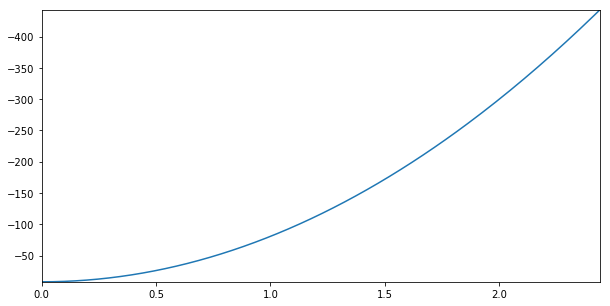

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
xar = np.linspace(a1-1, b1+1, 200)
ax.axis([a1-1, b1+1, P2(a1-1), P2(b1+1)])
ax.plot(xar, P2(xar))

Мы видим, что функция P2(x) монотонно возрастает на $[1, 1.44]$. Значит она принимает максимальное значение в точке $1.44$

In [21]:
M2 = P2(b1)
M2

-159.12351999999998

In [22]:
eps = 1e-4

Теперь мы можем определить шаги

In [37]:
h_trapez = np.abs((12*eps/(M2*(b1 - a1)))**0.5)
h_Simpson = np.abs((2880*eps/(M4*(b1 - a1)))**0.25)
print('Шаг для формулы трапеций меньше, чем ', h_trapez,
     '\nШаг для формулы Симпсона меньше, чем ', h_Simpson)

Шаг для формулы трапеций меньше, чем  0.00413996906645 
Шаг для формулы Симпсона меньше, чем  0.258582829677


### задание 5
Вычислить значения интеграла по составной квадратурной формуле с найденным шагом (см. ПРИЛОЖЕНИЕ 8.B).

Снчала нужно определить количество элементарных отрезков, на которые надо поделить наш отрезок.
Без ограничения общности рассмотрим случай для формулы трапеций. Шаг должен быть меньше найденной величины $htr$. Значит, при  шаге, равном $htr$, число получившихся элементарных отрезков $ktr\geq\Bigl[\frac{b-a}{htr}\Bigr]$, где $[\cdot]$ - целая часть от деления.

Пусть для всех отрезков размер шага будет равен $htr$, а для последнего возьмём $b-(a+htr\cdot ktr)$ для увеличения точности. Это необходимо сделать прежде всего для формулы Симпсона, где размер шага велик.

In [54]:
def Integral(I, k, h):
    I_h = 0
    for i in range(k):
        x1 = a1 + i*h
        x2 = x1 + h
        I_h += I(x1, x2)
    I_h += I(x2, b1)
    return I_h

In [56]:
ktr = int((b1 - a1) // h_trapez)
Int_trapez = Integral(Trapezoid, ktr, h_trapez)

ks = int((b1- a1) // h_Simpson)
Int_Simpson = Integral(Simpson, ks, h_Simpson)

print('Формула трапеций: ', Int_trapez, '\nФормула Симпсона: ', Int_Simpson)

Формула трапеций:  -5.06111480606 
Формула Симпсона:  -5.06110990291


### задание 6
Найти абсолютные погрешности результатов.

In [58]:
print('Абсолютная погрешность формулы трапеций: ', r(Int_exact, Int_trapez), 
      '\nАбсолютная погрешность формулы Симпсона: ', r(Int_exact, Int_Simpson))

Абсолютная погрешность формулы трапеций:  7.36614033396e-05 
Абсолютная погрешность формулы Симпсона:  6.87582508903e-05


Мы хотели добиться точности $\varepsilon = 10^{-4}$, получили $10^{-5}$, все супер

## Задача 8.3
Вычислить значение интеграла $\int\limits_{a}^{b}f(x)dx$ аналитически и, используя формулу центральных прямоугольников, с шагами $h: \frac{b-a}{2}, \frac{b-a}{3},...\frac{b-a}{20}$. При указанных значениях $h$ найти абсолютную погрешность и оценки теоретической абсолютной погрешности. На одном чертеже построить графики найденных погрешностей.


$\large f(x) = \sqrt[3]{2 x}  \bigg(\cos{(x^2)} - 2\bigg);$

$\large a = -2, b = 0$

Формула для оценки теоретической абсолютной погрешности:
$\Large R=\frac{M_2(b-a)h^2}{24}$

In [63]:
def f(x):
    return ((2*x)**(1/3))*(np.cos(x**2)-2)
a = -2
b = 0

* 1-ая производная: $f^{(1)}(x) = \dfrac{\sqrt[3]{2} (\cos{(x^2)-2})}{3 x^{2/3}} - 2 \cdot 2^{1/3} x^{4/3} \sin{(x^2)}$

* 2-ая производная: $f^{(2)}(x) = -\dfrac{2 \cdot 2^{1/3} (\cos{(x^2)-2})}{9 x^{5/3}} - 4 \cdot 2^{1/3} x^{7/3} \cos{(x^2)} - \dfrac{10}{3} \cdot 2^{1/3} \cdot x^{1/3} \cdot \sin{(x^2)}$

In [66]:
# 1-ая производная
def f1(x):
    return ((2**(1/3)*(np.cos(x**2)-2))/(3*x**(2/3))) - (2*(2**(1/3))*(x**(4/3))*np.sin(x**2))
# 2-ая производная
def f2(x):
    return -((2*2**(1/3)*(np.cos(x**2)-2))/(9*x**(5/3))) - (4*(2**(1/3))*(x**(7/3))*np.cos(x**2)) - (10/3)*(2**(1/3)*(x**(1/3))*np.sin(x**2))

Найдём максимальное по модулю значение второй производной на $[-2, 0]$ 

C:\Users\Alexandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


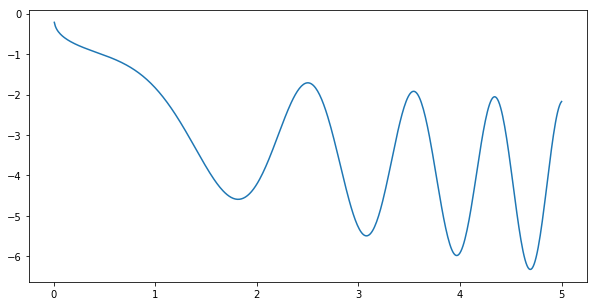

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-5, 5, 1000)
ax.plot(x, f(x))

In [74]:
xar = np.linspace(a1, b1, 2000)
fmoduls = np.abs(f(xar))
M2 = np.max(fmoduls)
print(M2)

3.5311187834


In [75]:
def Rcr_th(h):
    return M2*(b-a)*h**2/24

In [76]:
Inf = integrate.quad(f, a1, b1)[0]
print('Интеграл f(x): ', Inf)

Интеграл f(x):  -1.151791054316246


In [77]:
def Icr(x1, x2):
    h = x2-x1
    x12 = (x1+x2) /2
    return h * f(x12)

In [82]:
Rcr = list()
Rcr2 = list()
print('Формула центральных прямоугольников')
for kcr in range(2, 21):
    hcr=(b-a) / kcr
    Icr_h=Integral(Icr, kcr, hcr)
    Rcr.append(r(Inf, Icr_h))
    Rcr2.append(Rcr_th(hcr))
    print(kcr, 'отрезков: ', Icr_h)

Формула центральных прямоугольников
2 отрезков:  -0.922945306435
3 отрезков:  -1.81044972226
4 отрезков:  -1.92755830775
5 отрезков:  -1.95489356447
6 отрезков:  -1.96518881103
7 отрезков:  -1.97020562481
8 отрезков:  -1.97305085079
9 отрезков:  -1.9748319492
10 отрезков:  -1.9760266634
11 отрезков:  -1.97686995294
12 отрезков:  -1.97748894922
13 отрезков:  -1.97795761808
14 отрезков:  -1.97832151789
15 отрезков:  -1.97861002935
16 отрезков:  -1.97884283057
17 отрезков:  -1.97903352552
18 отрезков:  -1.97919177559
19 отрезков:  -1.97932460308
20 отрезков:  -1.97943721598


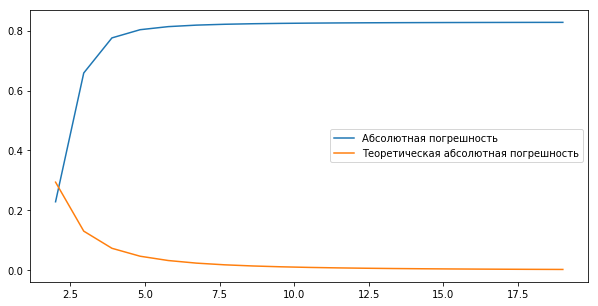

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))
xar = np.linspace(2, 19, 19)
ax.plot(xar, Rcr, label='Aбсолютная погрешность')
ax.plot(xar, Rcr2, label='Теоретическая aбсолютная погрешность')
ax.legend()